<a href="https://colab.research.google.com/github/pavankmr1/BTP_Project/blob/main/Diabetes_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing Libraries
import numpy as np   
np.random.seed(42)   ## so that output would be same
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
#Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
#for warning
from warnings import filterwarnings
filterwarnings("ignore")  ## To remove any kind of warning
#for ensemble models

In [ ]:
data = pd.read_csv('diabetes.csv')
data
#k-fold cross validation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#random data shuffelin
data.sample(frac=1)
#Spliting the data
X = data.drop("Outcome",axis=1)
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
#Logistic Regression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);
## Evaluating the model
score = log_reg.score(X_test,y_test)
print("Accuracy = " , end = "")
print(score*100)
y_preds = log_reg.predict(X_test)
print(classification_report(y_test, y_preds))
log_reg = log_reg.score(X_test,y_test)

Accuracy = 83.11688311688312
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       111
           1       0.76      0.58      0.66        43

    accuracy                           0.83       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.83      0.83      0.82       154



In [ ]:
## K-Nearest Neighbours
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
y_preds = knn.predict(X_test)
print(classification_report(y_test, y_preds))
knn = knn.score(X_test,y_test)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       111
           1       0.60      0.65      0.62        43

    accuracy                           0.78       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.79      0.78      0.78       154



In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
## Evaluating the model
y_preds = svm.predict(X_test)
print(classification_report(y_test, y_preds))
svm = svm.score(X_test,y_test)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       111
           1       0.75      0.49      0.59        43

    accuracy                           0.81       154
   macro avg       0.79      0.71      0.73       154
weighted avg       0.80      0.81      0.80       154



In [ ]:
dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train); 
## Evaluating the model
y_preds = dtree.predict(X_test)
print(classification_report(y_test, y_preds))
dtree = dtree.score(X_test,y_test)

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       111
           1       0.53      0.65      0.58        43

    accuracy                           0.74       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.76      0.74      0.75       154



In [ ]:
models1 = [('lr',LogisticRegression()),('svm',SVC()),('knn', KNeighborsClassifier()), ('dtree', DecisionTreeClassifier())]
ensemble_hard = VotingClassifier(estimators=models1, voting='hard')
ensemble_hard.fit(X_train, y_train)
y_preds = ensemble_hard.predict(X_test)
print(classification_report(y_test, y_preds))
ensemble_hard = ensemble_hard.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       111
           1       0.75      0.49      0.59        43

    accuracy                           0.81       154
   macro avg       0.79      0.71      0.73       154
weighted avg       0.80      0.81      0.80       154



In [ ]:
models2 = [('lr',LogisticRegression()),('svm',SVC(probability=True)),('knn', KNeighborsClassifier()), ('dtree', DecisionTreeClassifier())]
ensemble_soft = VotingClassifier(estimators=models2, voting='soft')
ensemble_soft.fit(X_train, y_train)
y_preds = ensemble_soft.predict(X_test)
print(classification_report(y_test, y_preds))
ensemble_soft = ensemble_soft.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       111
           1       0.63      0.67      0.65        43

    accuracy                           0.80       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.80      0.80      0.80       154



In [ ]:
#model_compare

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}
# Tune LogisticRegression
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=log_reg_grid,
                                  cv=5,
                                  n_iter=20,
                                  verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)
y_preds = rs_log_reg.predict(X_test)
score = rs_log_reg.score(X_test,y_test)
print(score*100)
print(classification_report(y_test, y_preds))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
83.76623376623377
              precision    recall  f1-score   support

           0       0.85      0.95      0.89       111
           1       0.80      0.56      0.66        43

    accuracy                           0.84       154
   macro avg       0.82      0.75      0.78       154
weighted avg       0.83      0.84      0.83       154



In [ ]:
log_reg_grid = {'C': np.logspace(-4,4,30),
"solver":["liblinear"]}
#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                           verbose=True)
#fit grid search cv
gs_log_reg.fit(X_train,y_train)
y_preds = gs_log_reg.predict(X_test)
gs_log_reg_score = gs_log_reg.score(X_test,y_test)
print(gs_log_reg_score)
print(classification_report(y_test, y_preds))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.8376623376623377
              precision    recall  f1-score   support

           0       0.85      0.95      0.89       111
           1       0.80      0.56      0.66        43

    accuracy                           0.84       154
   macro avg       0.82      0.75      0.78       154
weighted avg       0.83      0.84      0.83       154



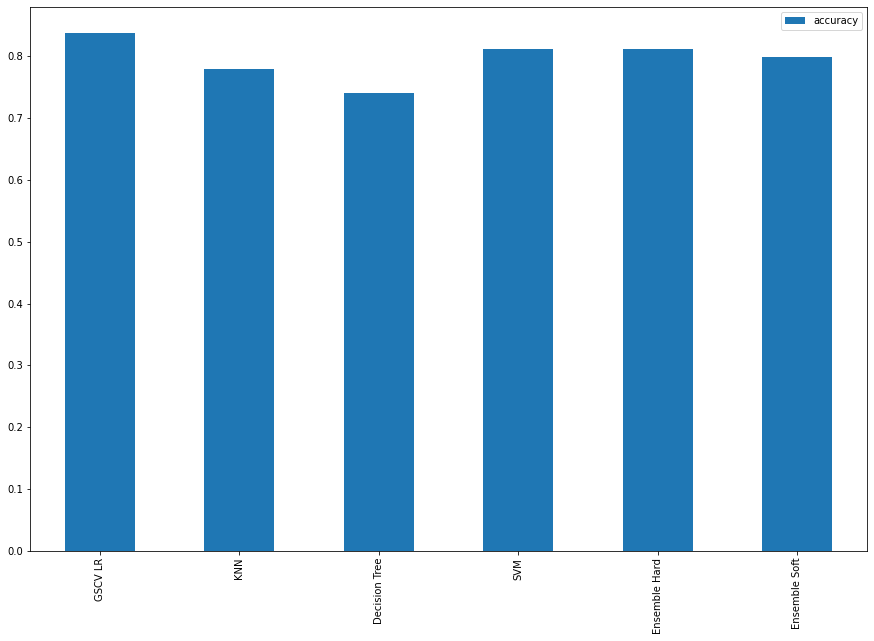

In [ ]:
gs_log_reg_score = gs_log_reg.score(X_test,y_test)
#print(gs_log_reg_score)
model_compare = pd.DataFrame({"GSCV LR":gs_log_reg_score,
"KNN":knn,
"Decision Tree":dtree,
"SVM":svm,
"Ensemble Hard": ensemble_hard,
"Ensemble Soft": ensemble_soft},
index=["accuracy"])
model_compare.T.plot.bar(figsize=(15,10))
##############OUTPUT###############
#Model-    Logistic Regression     KNN      Decision Tree         SVM        Ensemble Hard  Ensemble Soft
#accuracy      0.746753	        0.662338	    0.766234	        0.766234	     0.75974	      0.746753

In [ ]:
model_compare

,GSCV LR,KNN,Decision Tree,SVM,Ensemble Hard,Ensemble Soft
accuracy,0.837662,0.779221,0.74026,0.811688,0.811688,0.798701
